/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20070 (\N{CJK UNIFIED IDEOGRAPH-4E66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.c

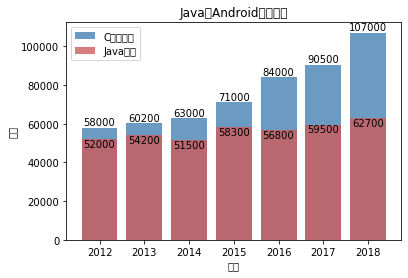

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x_data = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
y_data = [58000, 60200, 63000, 71000, 84000, 90500, 107000]
y_data2 = [52000, 54200, 51500,58300, 56800, 59500, 62700]

plt.bar(x=x_data, height=y_data, label='C语言基础', color='steelblue', alpha=0.8)
plt.bar(x=x_data, height=y_data2, label='Java基础', color='indianred', alpha=0.8)
# 在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
for x, y in enumerate(y_data):
    plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y_data2):
    plt.text(x, y + 100, '%s' % y, ha='center', va='top')
# 设置标题
plt.title("Java与Android图书对比")
# 为两条坐标轴设置名称
plt.xlabel("年份")
plt.ylabel("销量")
# 显示图例
plt.legend()
plt.show()


# 画动态图每天的节点数变化图，和边数目变化图

In [5]:
import pickle
import numpy as np
import pandas as pd
from utils import *

num_days = 2431
num_stocks = 1931  # or 1271
stock_list_path = "./data/stock_codes_1931.txt"
date_list_path = "./data/trading_opendays_2431.txt"
stock_id_map = get_stock_id_mapping(stock_list_path)
days_id_map = get_days_id_mapping(date_list_path)

concept_graph = np.load("./data/concepts_graph_1931_233_3.npy")
np.fill_diagonal(concept_graph, 0)  # remove selfloop
# np.multiply(cpncept_graph, cur_mask.reshape(-1, 1))  # broadcast: [n*n] * [n*1] -> [n*n]


In [7]:
print(concept_graph.shape, concept_graph[1][1])

(1931, 1931) 0.0


In [8]:
mask = np.zeros((2431, 1931, 1))
stock_cnt = [0 for i in range(len(days_id_map))]
edges_cnt = [0 for i in range(len(days_id_map))]

# 5min 35s
for stock_code in stock_id_map.keys():
    # print(stock_code)
    stock_id = stock_id_map.get(stock_code, -1)
    if stock_id == -1:
        continue

    cur_prices = pd.read_csv('../data/close_hfq_2006/'+stock_code+'.csv')
    for idx, row in cur_prices.iterrows():
        trade_date_id = days_id_map.get(str(row['trade_date']), -1)
        if trade_date_id == -1:
            continue
        stock_cnt[trade_date_id] += 1
        mask[trade_date_id][stock_id] = 1

In [9]:
with open("./data/stock_cnt.pickle", "wb") as fp:   #Pickling
    pickle.dump(stock_cnt, fp)
    # unpickle: 'rb', res = pickle.load(fp)


In [11]:
# 33seconds
for i in range(len(days_id_map)):
    edges_cnt[i] = np.sum(np.multiply(concept_graph, mask[i]))
    # print(edges_cnt[i])

In [12]:

with open("./data/edges_cnt_without_selfloop.pickle", "wb") as fp:   #Pickling
    pickle.dump(edges_cnt, fp)



In [4]:
print(stock_cnt)

[1215, 1213, 1217, 1212, 1204, 1211, 1217, 1219, 1218, 1190, 1221, 1214, 1212, 1221, 1216, 1208, 1222, 1225, 1215, 1217, 1215, 1224, 1225, 1233, 1222, 1217, 1226, 1230, 1227, 1240, 1236, 1225, 1236, 1226, 1208, 1221, 1211, 1218, 1229, 1222, 1225, 1233, 1229, 1234, 1230, 1227, 1234, 1231, 1221, 1229, 1222, 1226, 1228, 1219, 1214, 1222, 1216, 1207, 1232, 1218, 1221, 1227, 1219, 1214, 1211, 1229, 1235, 1210, 1187, 1216, 1195, 1223, 1199, 1195, 1206, 1204, 1200, 1213, 1214, 1229, 1224, 1223, 1204, 1205, 1205, 1208, 1209, 1205, 1207, 1167, 1205, 1185, 1183, 1209, 1212, 1199, 1212, 1182, 1202, 1226, 1225, 1211, 1213, 1223, 1217, 1226, 1214, 1215, 1190, 1191, 1214, 1207, 1210, 1224, 1201, 1183, 1188, 1204, 1230, 1230, 1218, 1222, 1223, 1225, 1217, 1216, 1231, 1231, 1218, 1217, 1222, 1221, 1223, 1221, 1219, 1208, 1221, 1210, 1210, 1216, 1219, 1224, 1223, 1218, 1221, 1214, 1211, 1217, 1215, 1210, 1203, 1217, 1216, 1211, 1214, 1213, 1214, 1213, 1215, 1200, 1211, 1218, 1217, 1222, 1213, 1222, 121

In [11]:
list_cnt = [0 for i in range(len(days_id_map))]

s_list = pd.read_csv("./data/stock_main_list_2139_9.csv")
slist = s_list[s_list['list_date'] < 20191231]  # 1931
print(s_list.shape)
s_list.head()

for idx,row in s_list.iterrows():
    list_date = str(row['list_date'])
    if list_date < '20100101' or list_date > '20200101':
        continue
    list_date_id = days_id_map.get(list_date, -1)
    while list_date_id == -1 and list_date < '20200101':
        print(list_date)
        list_date = increment_date(list_date, 1)
        list_date_id = days_id_map.get(list_date, -1)
    if list_date_id == -1:
        continue
    list_cnt[list_date_id] += 1
    
# print(list_cnt)

(2139, 10)


In [39]:
for i, x in enumerate(stock_cnt):
    if x<1000:
        print(i, x)
print(stock_cnt[1330:1340])
# 20150708开始的三天
'''
2015年7月8日周三，沪指大幅低开，创业板指和深成指更是以一字跌停开盘。收盘上證指數大跌5.9%，險守3500點。滬深兩市合共有1,346隻A股停牌，佔總數2,808隻近一半。[63]从6月15日至7月8日，17个交易日沪指最大跌幅达34.9%，创业板指最大跌幅更达42.9%，超过半数公司股价跌幅更超过50%。[64]同日，中證監要求過去半年減持過公司股票的大股東及高層增持，而且要求所有上市公司的大股東停止沽貨，否則一律嚴肅處理。[65]

2015年7月8日，深證成指收盘11040.89點，較6月12日跌40.0%，達2015年最低。2015年7月9日，上證綜指盘中触及3373.54點，較6月12日盘中最高跌34.9%，達2015年最低。

2015年7月9日周四，沪指低开高走，早段低見3373.54点后探底回升，午后一度大涨近7%，收市升202.14点或5.76%，报3709.33点，创业板指封上涨停板。[66]

2015年7月10日周五，沪指高开高走，创业板指封上涨停板。

知乎问题：如何看待2015年7月8日中国股市大跌 https://www.zhihu.com/question/32018053
'''

1336 954
1337 881
1338 916
[1289, 1291, 1289, 1277, 1252, 1196, 954, 881, 916, 1154]


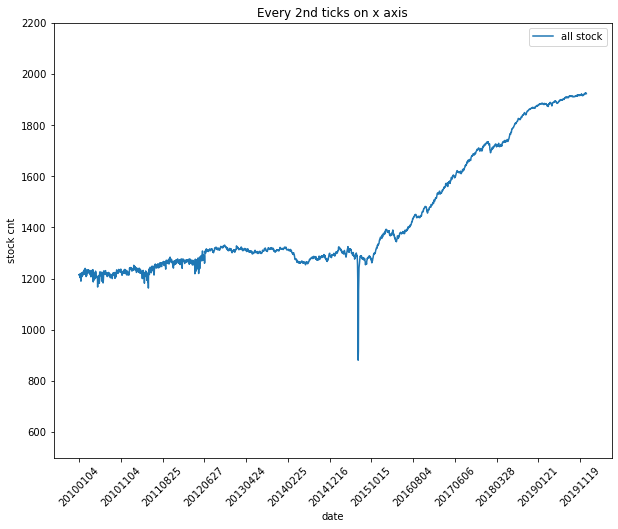

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#net_count = [stock_cnt[i]-list_cnt[i] for i in range(len(days_id_map))]
x = list(days_id_map.keys())
# fig, ax = plt.subplots(2,1)
plt.figure(figsize=(10,8))
ax = plt.axes()

ax.plot(x, stock_cnt, label='all stock')
# plt.bar(x=[int(i) for i in days_id_map.keys()], height=stock_cnt, label='all stocks', color='indianred')

ax.set_xticks(x[::200])
ax.set_xticklabels(x[::200], rotation=45)
ax.set_ylim((500,2200))
ax.set_title("Every 2nd ticks on x axis")


# 为两条坐标轴设置名称
ax.set_xlabel("date")
ax.set_ylabel("stock cnt")

# 显示图例
plt.legend()

plt.show()


In [20]:
aaa = list(days_id_map.keys())[0]
print(aaa, type(aaa))
bbb = np.datetime64(aaa)
print(bbb, type(bbb))

20100104 <class 'str'>
20100104 <class 'numpy.datetime64'>


In [155]:

with open("./data/stock_cnt.pickle", "rb") as fp:   #Pickling
    stock_cnt = pickle.load(fp)
    # unpickle: 'rb', res = pickle.load(fp)
with open("./data/edges_cnt_without_selfloop.pickle", "rb") as fp:   #Pickling
    edges_cnt = pickle.load(fp)

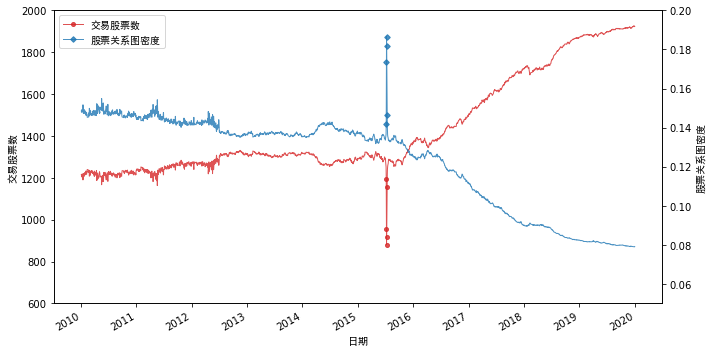

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as mfm

plt.rcParams['image.cmap']='jet'

font_path = "../scp_zh/fonts/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)

# Create some mock data
t = list(days_id_map.keys())
t = [np.datetime64(t[i][:4]+"-"+t[i][4:6]+"-"+t[i][6:]) for i in range(len(days_id_map))]

density = [edges_cnt[i]/(stock_cnt[i]**2) for i in range(len(days_id_map))]
markers_on = [1335, 1336, 1337, 1338, 1339]
fig, ax1 = plt.subplots(figsize=(10,5))
# plt.figure(figsize=(10,8))

color = 'tab:red'
ax1.set_xlabel('日期', fontproperties=prop)
ax1.set_ylabel('交易股票数', fontproperties=prop)
lns1 = ax1.plot(t, stock_cnt, "-o", markevery=markers_on, label="交易股票数", color=color, alpha=0.8,  linewidth=1, markersize=4)  #  "--o",
ax1.tick_params(axis='y')  # , labelcolor=color
ax1.set_ylim(600, 2000)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('股票关系图密度', fontproperties=prop)  # color=color we already handled the x-label with ax1
lns2 = ax2.plot(t, density, "-D", markevery=markers_on, label='股票关系图密度', color=color, alpha=0.8, linewidth=1, markersize=4)
ax2.tick_params(axis='y')  # , labelcolor=color
ax2.set_ylim(0.05, 0.2)

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, prop=prop)

fig.autofmt_xdate()
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("./graphs/概念板块图动态展示",facecolor='w', dpi=150)

plt.show()

# NASDAQ和NYSE统计图的动态性

In [143]:
market = "NYSE"
stock_num = 1026 if market=="NASDAQ" else 1737

train = np.load("./data/{}/train_756_{}_6.npy".format(market, stock_num))
valid = np.load("./data/{}/valid_252_{}_6.npy".format(market, stock_num))
test = np.load("./data/{}/test_237_{}_6.npy".format(market, stock_num))
data = np.concatenate([train, valid, test], axis=0)
print(data.shape)

train_mask = np.load("./data/{}/train_mask_756_{}.npy".format(market, stock_num))
valid_mask = np.load("./data/{}/valid_mask_252_{}.npy".format(market, stock_num))
test_mask = np.load("./data/{}/test_mask_237_{}.npy".format(market, stock_num))
mask = np.concatenate([train_mask, valid_mask, test_mask], axis=0)
print(mask.shape)

graph = np.load("./data/graphs/{}_{}_{}.npy".format(market, stock_num, stock_num))
print(graph.shape)

(1245, 1737, 6)
(1245, 1737)
(1737, 1737)


In [144]:
# 1245 days
stock_cnt = [0 for i in range(1245)]
edges_cnt = [0 for i in range(1245)]

for i in range(1245):
    stock_cnt[i] = np.sum(mask[i])
    edges_cnt[i] = np.sum(np.multiply(graph, mask[i]))
    # print(edges_cnt[i])

In [154]:
for i in range(1245):
    if stock_cnt[i] < 1720:
        print(i, stock_cnt[i])
'''
NASDAQ < 1000
0 987.0
991 999.0
992 998.0
993 997.0
994 998.0
995 999.0
996 999.0
997 998.0
998 998.0
999 999.0
1000 999.0

NYSE < 1720
0 1701.0
1 1708.0
2 1709.0
3 1709.0
4 1709.0
5 1710.0
6 1711.0
7 1711.0
8 1712.0
9 1712.0
10 1713.0
11 1714.0
12 1715.0
13 1716.0
14 1717.0
15 1717.0
16 1717.0
746 1716.0
747 1717.0

'''

0 1701.0
1 1708.0
2 1709.0
3 1709.0
4 1709.0
5 1710.0
6 1711.0
7 1711.0
8 1712.0
9 1712.0
10 1713.0
11 1714.0
12 1715.0
13 1716.0
14 1717.0
15 1717.0
16 1717.0
746 1716.0
747 1717.0


'\nNASDAQ\n0 987.0\n991 999.0\n992 998.0\n993 997.0\n994 998.0\n995 999.0\n996 999.0\n997 998.0\n998 998.0\n999 999.0\n1000 999.0\n'

In [117]:
trading_days = []
with open("./data/NASDAQ_trading_days_1245.txt", "r") as f:
    for line in f:
        trading_days.append(line.strip().split(" ")[0])
        # yyyy-mm-dd
print(len(trading_days), trading_days[0], trading_days[-1])

1245 2013-01-02 2017-12-08


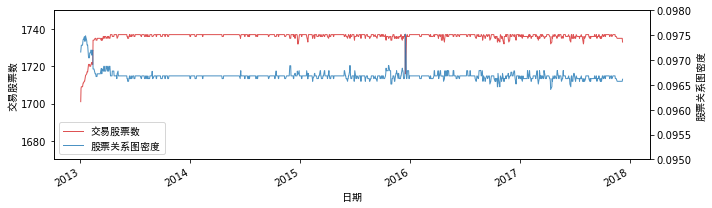

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as mfm

plt.rcParams['image.cmap']='jet'

font_path = "../scp_zh/fonts/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)


t = [np.datetime64(trading_days[i]) for i in range(1245)]
density = [edges_cnt[i]/(stock_cnt[i]**2) for i in range(1245)]

fig, ax1 = plt.subplots(figsize=(10,3))
# plt.figure(figsize=(10,8))

color = 'tab:red'
ax1.set_xlabel('日期', fontproperties=prop)
ax1.set_ylabel('交易股票数', fontproperties=prop)
lns1 = ax1.plot(t, stock_cnt, label="交易股票数", color=color, alpha=0.8,  linewidth=1, markersize=4)  #  "--o",
ax1.tick_params(axis='y')  # , labelcolor=color
ax1.set_ylim(1670, 1750)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('股票关系图密度', fontproperties=prop)  # color=color we already handled the x-label with ax1
lns2 = ax2.plot(t, density, label='股票关系图密度', color=color, alpha=0.8, linewidth=1, markersize=4)
ax2.tick_params(axis='y')  # , labelcolor=color
ax2.set_ylim(0.095, 0.098)

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, prop=prop)

fig.autofmt_xdate()
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("./graphs/NYSE动态展示",facecolor='w', dpi=150)

plt.show()

# IC 图随时间变化

In [27]:
import pickle
import numpy as np
import pandas as pd
from utils import *

num_days = 2431
num_stocks = 1931  # or 1271
stock_list_path = "./data/stock_codes_1931.txt"
date_list_path = "./data/trading_opendays_2431.txt"
stock_id_map = get_stock_id_mapping(stock_list_path)
days_id_map = get_days_id_mapping(date_list_path)

In [28]:
import copy
import pickle

window_size_list = [5, 20, 60, 250, 750]
min_ic_list = [0.6, 0.8]

stock_cnt_dict, density_dict = {}, {}

for window_size in window_size_list:
    for min_ic in min_ic_list:
        node_fname = "../data/stock_cnt_icgraph_{}_{}.pickle".format(window_size, min_ic)
        edge_fname = "../data/edges_cnt_without_selfloop_icgraph_{}_{}.pickle".format(window_size, min_ic)
        with open(node_fname, "rb") as f:
            stock_cnt = pickle.load(f)
        with open(edge_fname, "rb") as f:
            edges_cnt = pickle.load(f)
        density = [edges_cnt[i]/(stock_cnt[i]**2) for i in range(2431)]
        
        print(window_size, min_ic, stock_cnt[:10], edges_cnt[:10])

        k = "icgraph_" + str(window_size) + "_" + str(min_ic)
        print(k, len(stock_cnt), len(density))
        stock_cnt_dict[k] = copy.deepcopy(stock_cnt)
        density_dict[k] = density

5 0.6 [1215.0, 1213.0, 1217.0, 1212.0, 1204.0, 1211.0, 1217.0, 1219.0, 1218.0, 1190.0] [583150.0, 581265.0, 582696.0, 580769.0, 574036.0, 576759.0, 578709.0, 578454.0, 578622.0, 565357.0]
icgraph_5_0.6 2431 2431
5 0.8 [1215.0, 1213.0, 1217.0, 1212.0, 1204.0, 1211.0, 1217.0, 1219.0, 1218.0, 1190.0] [296069.0, 295263.0, 295602.0, 294849.0, 291518.0, 292970.0, 293684.0, 293393.0, 293814.0, 286733.0]
icgraph_5_0.8 2431 2431
20 0.6 [1215.0, 1213.0, 1217.0, 1212.0, 1204.0, 1211.0, 1217.0, 1219.0, 1218.0, 1190.0] [810258.0, 809035.0, 809213.0, 805057.0, 800718.0, 804623.0, 808651.0, 808846.0, 807418.0, 790263.0]
icgraph_20_0.6 2431 2431
20 0.8 [1215.0, 1213.0, 1217.0, 1212.0, 1204.0, 1211.0, 1217.0, 1219.0, 1218.0, 1190.0] [452376.0, 451990.0, 451036.0, 448319.0, 447541.0, 448839.0, 450962.0, 450846.0, 450063.0, 439509.0]
icgraph_20_0.8 2431 2431
60 0.6 [1215.0, 1213.0, 1217.0, 1212.0, 1204.0, 1211.0, 1217.0, 1219.0, 1218.0, 1190.0] [958825.0, 955684.0, 958218.0, 955127.0, 948176.0, 956968.0,

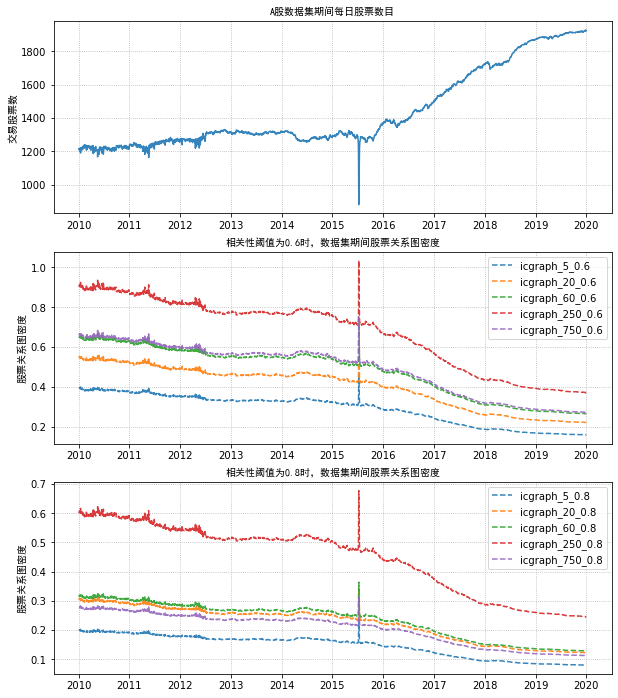

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as mfm

plt.rcParams['image.cmap']='jet'

font_path = "../scp_zh/fonts/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)

# Create some mock data
t = list(days_id_map.keys())
t = [np.datetime64(t[i][:4]+"-"+t[i][4:6]+"-"+t[i][6:]) for i in range(len(days_id_map))]

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=1, nrows=3, sharex=False, figsize=(10, 12)  # constrained_layout=True,
)

ax1.plot(t, stock_cnt_dict["icgraph_250_0.8"],  alpha=0.9)
# ax1.set_xlabel("日期", fontproperties=prop)
ax1.set_ylabel("交易股票数", fontproperties=prop)
ax1.grid(linestyle=":")
ax1.set_title("A股数据集期间每日股票数目", fontproperties=prop)
# ax1.legend(prop=prop)

min_ic1 = 0.6  # ax2, ax4
k_list1 = ["icgraph_{}_{}".format(window_size, min_ic1) for window_size in window_size_list]
linestyles = ["--", "--","--","--","--"]

for k in range(len(k_list1)):
    ax2.plot(t, density_dict[k_list1[k]], linestyles[k], alpha=0.9, label=k_list1[k])

# ax2.set_xlabel("日期", fontproperties=prop)
ax2.set_ylabel("股票关系图密度", fontproperties=prop)
#ax1.set_xscale("log")
#ax1.set_xlim(1, t[-1])
#ax1.set_ylim(0, 100)
ax2.legend()  # loc="lower right"
ax2.grid(linestyle=":")
ax2.set_title("相关性阈值为0.6时，数据集期间股票关系图密度", fontproperties=prop)
ax2.text(0.45, -0.4, "(a)", transform=ax2.transAxes, size=14)


min_ic2 = 0.8  # ax1, ax3
k_list2 = ["icgraph_{}_{}".format(window_size, min_ic2) for window_size in window_size_list]

for k in range(len(k_list2)):
    ax3.plot(t, density_dict[k_list2[k]], linestyles[k], alpha=0.9, label=k_list2[k])

# ax3.set_xlabel("日期", fontproperties=prop)
ax3.set_ylabel("股票关系图密度", fontproperties=prop)
ax3.legend()
ax3.grid(linestyle=":")
ax3.set_title("相关性阈值为0.8时，数据集期间股票关系图密度", fontproperties=prop)


# fig.autofmt_xdate()
# ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
# fig.savefig("./graphs/ic图随时间变化统计.png", facecolor='w',dpi=200)
plt.show()

[1 2 3 4 5]


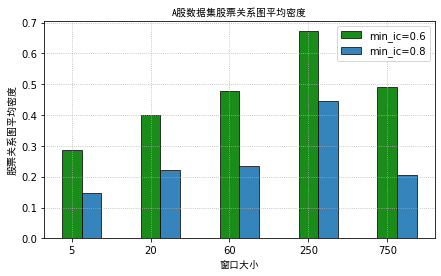

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as mfm

plt.rcParams['image.cmap']='jet'

font_path = "../scp_zh/fonts/SimHei.ttf"
prop = mfm.FontProperties(fname=font_path)

labels = [5, 20, 60, 250, 750]
fig, ax = plt.subplots(figsize=(7, 4))

x = np.arange(1, 6)
print(x)
width = 0.25

min_ic1 = 0.6  # ax2, ax4
k_list1 = ["icgraph_{}_{}".format(window_size, min_ic1) for window_size in window_size_list]
y1 = []
for k in range(len(k_list1)):
    y1.append(sum(density_dict[k_list1[k]]) / len(density_dict[k_list1[k]]))
ax.bar(x, y1, width, color="g", alpha=0.8, linewidth=0.8,
        edgecolor="k",label="min_ic=0.6")

min_ic2 = 0.8  # ax1, ax3
k_list2 = ["icgraph_{}_{}".format(window_size, min_ic2) for window_size in window_size_list]
y2 = []
for k in range(len(k_list2)):
    y2.append(sum(density_dict[k_list2[k]]) / len(density_dict[k_list2[k]]))
ax.bar(x+width, y2, width, alpha=0.8,linewidth=0.8,
        edgecolor="k", label="min_ic=0.8")

ax.set_xlabel("窗口大小", fontproperties=prop)
# ax.set_xscale("log")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("股票关系图平均密度", fontproperties=prop)
ax.grid(linestyle=":")
ax.set_title("A股数据集股票关系图平均密度", fontproperties=prop)
ax.legend() # prop=prop

# fig.autofmt_xdate()
# ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.savefig("./graphs/ic图平均密度.png", facecolor='w',dpi=200)
plt.show()

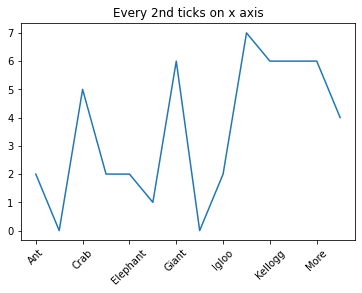

In [29]:
x = ["Ant", "Bob", "Crab", "Donkey", "Elephant", "Fire", "Giant","Hello",
     "Igloo", "Jump", "Kellogg","Llama", "More", "Night"]
y = np.random.randint(0,10,14)

ax = plt.axes()


ax.plot(x,y)
ax.set_xticks(x[::2])
ax.set_xticklabels(x[::2], rotation=45)
ax.set_title("Every 2nd ticks on x axis")

plt.show()